In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

In [33]:
adata = sc.read_h5ad("data/Immune_ALL_human.h5ad")

In [56]:
adata

AnnData object with n_obs × n_vars = 33506 × 12303
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue', 'batch_id', 'r0.8'
    uns: 'n_batch', 'pca', 'neighbors', 'umap', 'leiden', 'r0.8_colors', 'batch_colors', 'final_annotation_colors', 'chemistry_colors', 'tissue_colors', 'data_type_colors'
    obsm: 'z', 'X_pca', 'X_umap', 'X_vae'
    varm: 'PCs'
    layers: 'counts', 'y'
    obsp: 'distances', 'connectivities'

In [35]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [45]:
sc.tl.pca(adata, svd_solver='arpack')

In [46]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


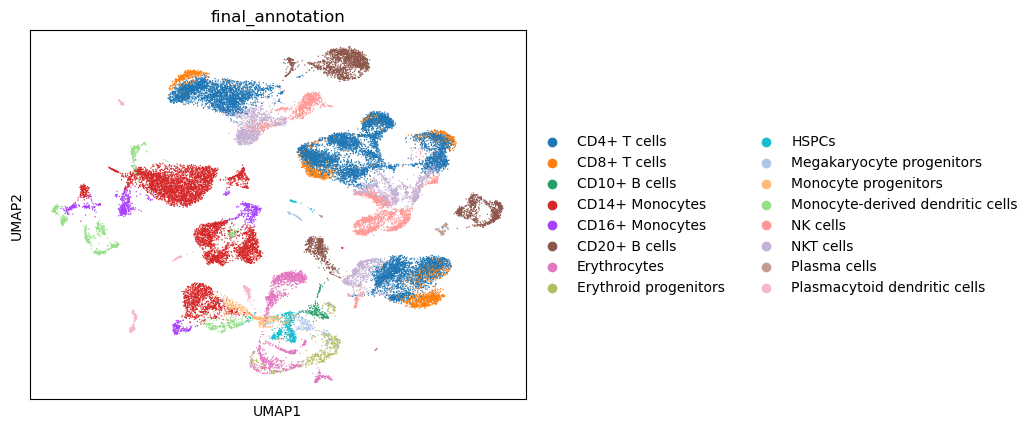

In [47]:
sc.pl.umap(adata, color='final_annotation', palette=sc.pl.palettes.vega_20_scanpy)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


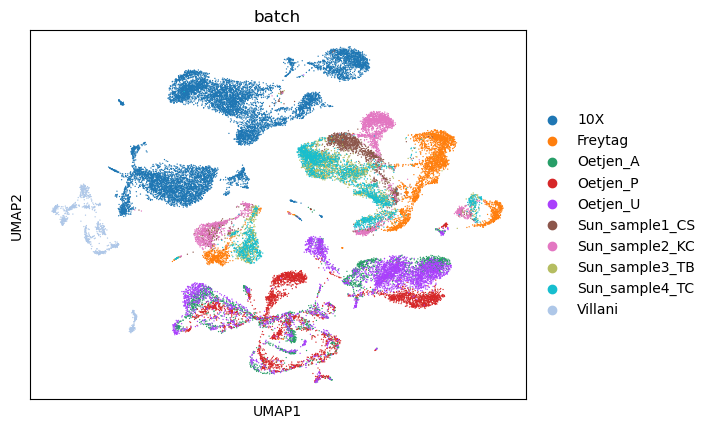

In [48]:
sc.pl.umap(adata, color='batch', palette=sc.pl.palettes.vega_20_scanpy)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


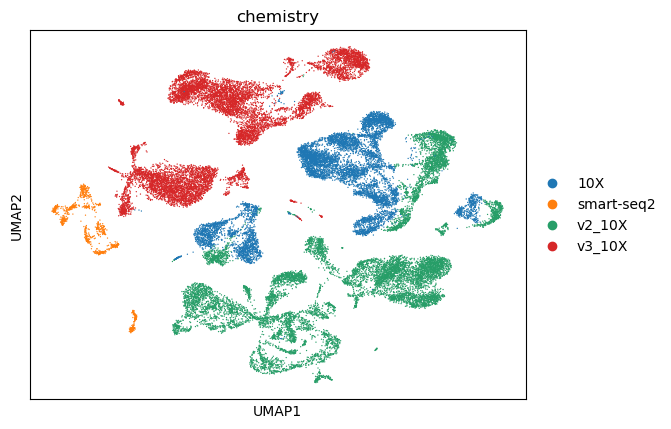

In [49]:
sc.pl.umap(adata, color='chemistry', palette=sc.pl.palettes.vega_20_scanpy)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


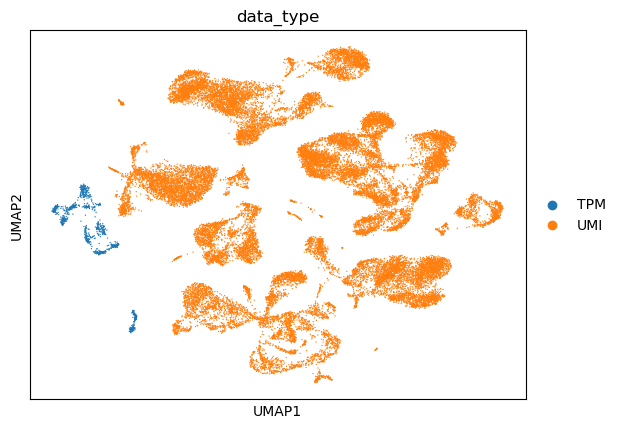

In [50]:
sc.pl.umap(adata, color='data_type', palette=sc.pl.palettes.vega_20_scanpy)

loss = MSE + 0.01 * sum(1/LISI)

In [36]:
from src.types import TrainParams

train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, params_file="benchmark_human_immune")

In [39]:
from src.vae.model import VAE
from src.model import ModelParams

model_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)
torch.set_num_threads(16)

model = VAE(adata, model_params)

In [40]:
from src.vae.train import train_vae
torch.autograd.set_detect_anomaly(False)

hist = train_vae(model, adata, batch_key="batch", params=train_params)

/media/gambino/students_workdir/anna/OtF-prostate/src/vae/dataloader.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[BATCH_KEY] = pd.Categorical(pd.factorize(adata.obs.loc[:, batch_key])[0])
/media/gambino/students_workdir/anna/OtF-prostate/src/vae/dataloader.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[BATCH_KEY] = pd.Categorical(pd.factorize(adata.obs.loc[:, batch_key])[0])
100%|█████████████████████████████| 210/210 [01:25<00:00,  2.46it/s]

EarlyStopping (epoch: 1): train loss improved to 0.2555311899223607



100%|███████████████████████████████| 53/53 [00:18<00:00,  2.90it/s]

EarlyStopping (epoch: 1): valid loss improved to 27.91384535015754



100%|█████████████████████████████| 210/210 [01:21<00:00,  2.57it/s]

EarlyStopping (epoch: 2): train loss improved to 0.170045154448001



100%|███████████████████████████████| 53/53 [00:17<00:00,  3.00it/s]

EarlyStopping (epoch: 2): valid loss improved to 15.544406908862996



100%|█████████████████████████████| 210/210 [01:21<00:00,  2.59it/s]

EarlyStopping (epoch: 3): train loss improved to 0.12176290869161346



100%|███████████████████████████████| 53/53 [00:17<00:00,  2.99it/s]

EarlyStopping (epoch: 3): valid loss improved to 12.457245880702757



100%|█████████████████████████████| 210/210 [01:21<00:00,  2.59it/s]

EarlyStopping (epoch: 4): train loss improved to 0.09711226148936948



100%|███████████████████████████████| 53/53 [00:17<00:00,  2.98it/s]

EarlyStopping (epoch: 4): valid loss improved to 10.909025462168568



100%|█████████████████████████████| 210/210 [01:22<00:00,  2.56it/s]

EarlyStopping (epoch: 5): train loss improved to 0.08272687731670134



100%|███████████████████████████████| 53/53 [00:17<00:00,  2.97it/s]

EarlyStopping (epoch: 5): valid loss improved to 9.863710313473108



100%|███████████████████████████████| 53/53 [00:17<00:00,  3.00it/s]

EarlyStopping (epoch: 6): valid loss improved to 8.946074764683562



100%|█████████████████████████████| 210/210 [01:21<00:00,  2.59it/s]

EarlyStopping (epoch: 7): train loss improved to 0.06962215140797703



100%|███████████████████████████████| 53/53 [00:17<00:00,  2.96it/s]

EarlyStopping (epoch: 7): valid loss improved to 8.703156858120325



100%|███████████████████████████████| 53/53 [00:17<00:00,  2.95it/s]

EarlyStopping (epoch: 8): valid loss improved to 8.374870084366709



100%|███████████████████████████████| 53/53 [00:17<00:00,  2.98it/s]

EarlyStopping (epoch: 9): valid loss improved to 8.161002977839056



100%|███████████████████████████████| 53/53 [00:17<00:00,  2.97it/s]

EarlyStopping (epoch: 10): valid loss improved to 8.057066323622218



100%|███████████████████████████████| 53/53 [00:17<00:00,  2.95it/s]

EarlyStopping (epoch: 11): valid loss improved to 7.901359801022512



100%|███████████████████████████████| 53/53 [00:18<00:00,  2.94it/s]

EarlyStopping (epoch: 12): valid loss improved to 7.7490592182807205



100%|███████████████████████████████| 53/53 [00:18<00:00,  2.94it/s]

EarlyStopping (epoch: 13): valid loss improved to 7.690669815495329



100%|███████████████████████████████| 53/53 [00:17<00:00,  4.07it/s]

EarlyStopping (epoch: 14): valid loss improved to 7.587538269330871



100%|███████████████████████████████| 53/53 [00:17<00:00,  2.95it/s]

EarlyStopping (epoch: 15): valid loss improved to 7.5295601340959655



100%|█████████████████████████████| 210/210 [01:22<00:00,  2.54it/s]

EarlyStopping (epoch: 16): train loss improved to 0.059538546844554154



100%|███████████████████████████████| 53/53 [00:18<00:00,  2.94it/s]

EarlyStopping (epoch: 16): valid loss improved to 7.474898122391611



100%|███████████████████████████████| 53/53 [00:17<00:00,  2.97it/s]

EarlyStopping (epoch: 17): valid loss improved to 7.442471783116178



100%|███████████████████████████████| 53/53 [00:17<00:00,  3.03it/s]

EarlyStopping (epoch: 18): valid loss improved to 7.380012026372945



100%|███████████████████████████████| 53/53 [00:17<00:00,  3.01it/s]

EarlyStopping (epoch: 20): valid loss improved to 7.310491912769821



100%|███████████████████████████████| 53/53 [00:17<00:00,  3.01it/s]

EarlyStopping (epoch: 21): valid loss improved to 7.258940912642569



100%|███████████████████████████████| 53/53 [00:17<00:00,  2.97it/s]

EarlyStopping (epoch: 22): valid loss improved to 7.181097876350835



100%|███████████████████████████████| 53/53 [00:17<00:00,  3.02it/s]

EarlyStopping (epoch: 24): valid loss improved to 7.114894687004809



100%|███████████████████████████████| 53/53 [00:17<00:00,  3.03it/s]

EarlyStopping (epoch: 25): valid loss improved to 7.0885381788577675



 13%|████                          | 28/210 [00:11<01:09,  2.63it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [41]:
hist

{'train_loss': [0.2555311899223607,
  0.170045154448001,
  0.12176290869161346,
  0.09711226148936948,
  0.08272687731670134,
  0.07416333970410167,
  0.06962215140797703,
  0.06696754703769363,
  0.06508352905578568,
  0.06378064894210117,
  0.06281698655591156,
  0.06182995975382238,
  0.06108218620933894,
  0.06043406702336794,
  0.06003088761471827,
  0.059538546844554154,
  0.059218014270365195,
  0.05890077207537128,
  0.05848369991898519,
  0.05809412435210831,
  0.057775286841154135,
  0.05742850351326502,
  0.057136744318604736,
  0.05684024373945274,
  0.05652473375274608,
  0.056331672413707436,
  0.056099952005518136,
  0.05600021198923384,
  0.05587525318637034,
  0.055651422063551136,
  0.055596259614813244,
  0.05550918990401186,
  0.05540470784501413,
  0.055396374473463614,
  0.05527647983278913,
  0.055203789331151235,
  0.055159149232541886,
  0.05503963662730884,
  0.0549653670873558,
  0.055032023261365845,
  0.05488882584636593,
  0.054883505244554646,
  0.0547937

100%|█████████████████████████████| 262/262 [00:13<00:00, 19.44it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = 

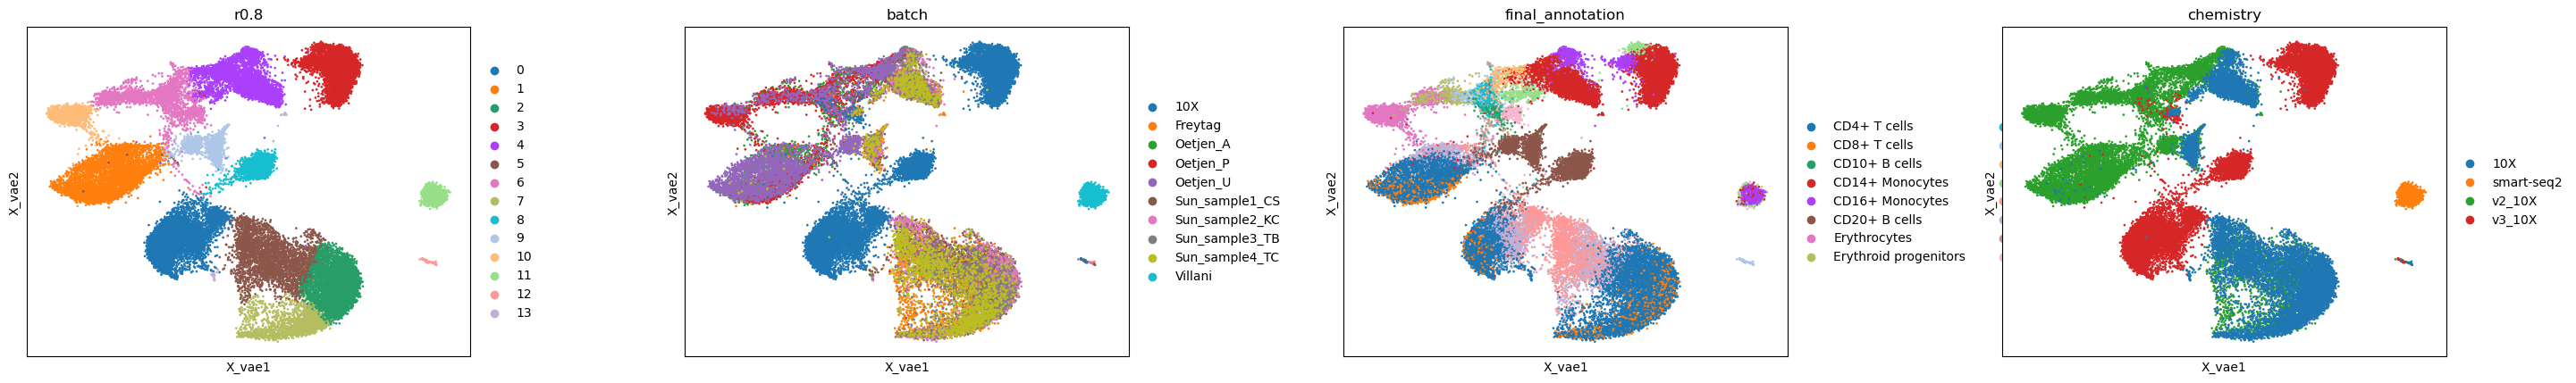

In [42]:
from src.vae.diagnostics import plot_embedding
plot_embedding(model, adata, keys=["batch", "final_annotation", "chemistry"], batch_key="batch", train_params=train_params)

/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


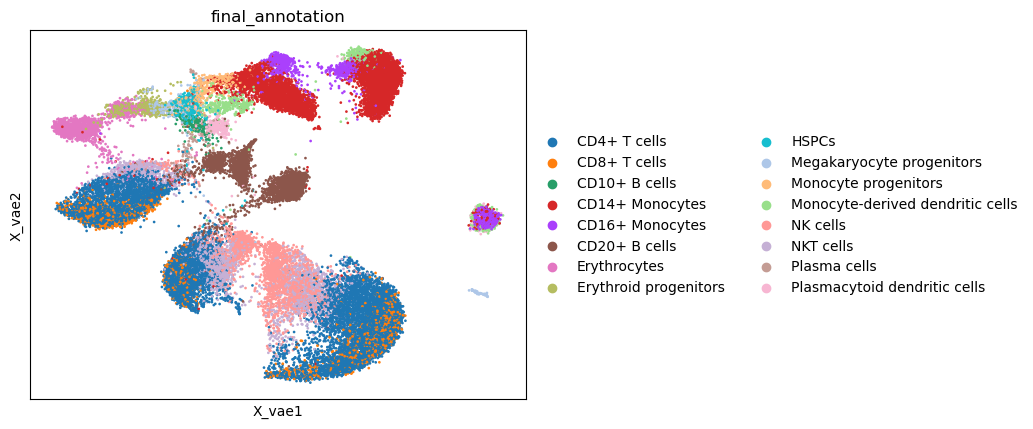

In [54]:
sc.pl.embedding(
        adata,
        "X_vae",
        color=["final_annotation"],
        size=15,
        wspace=0.35,
    )